In [12]:
import os
import matplotlib.pyplot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, \
    Dropout, GlobalMaxPooling2D, Activation, Rescaling

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,  # will return tuple (img, label) otherwise dict
    with_info=True,  # able to get info about dataset
)

In [10]:
image_shape = ds_info.features["image"].shape
print(f'Shape of Images in the Dataset: \t{image_shape}')

num_classes = ds_info.features["label"].num_classes
print(f'Number of Classes in the Dataset: \t{num_classes}')

names_of_classes = ds_info.features["label"].names
print(f'Names of Classes in the Dataset: \t{names_of_classes}\n')

for name in names_of_classes:
    print(f'Label for class \
          "{name}":  \t\t{ds_info.features["label"].str2int(name)}')

Shape of Images in the Dataset: 	(28, 28, 1)
Number of Classes in the Dataset: 	10
Names of Classes in the Dataset: 	['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Label for class           "0":  		0
Label for class           "1":  		1
Label for class           "2":  		2
Label for class           "3":  		3
Label for class           "4":  		4
Label for class           "5":  		5
Label for class           "6":  		6
Label for class           "7":  		7
Label for class           "8":  		8
Label for class           "9":  		9


In [11]:
print(f'Total examples in Train Dataset: \
      \t{len(ds_train)}')
print(f'Total examples in Test Dataset: \
      \t{len(ds_test)}')

Total examples in Train Dataset:       	60000
Total examples in Test Dataset:       	10000


In [13]:
def normalize_img(image, label):
    """Normalizes images"""
    return tf.cast(image, tf.float32) / 255.0, label

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 128

In [15]:
# Setup for train dataset
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)

In [16]:
# Setup for test Dataset
ds_test = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_train.batch(128)
ds_test = ds_train.prefetch(AUTOTUNE)

In [18]:
model = keras.Sequential(
    [
        keras.Input((28, 28, 1)),
        layers.Conv2D(32, 3, activation="relu", strides=2),
        layers.Conv2D(64, 3, activation='relu', strides=2),
        layers.Flatten(),
        Dropout(rate=0.2),
        layers.Dense(512, activation="relu"),
        Dropout(rate=0.2),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

In [19]:
model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

In [20]:
history = model.fit(ds_train, validation_data=ds_test, epochs=15, verbose=2)

Epoch 1/15
469/469 - 15s - loss: 0.2268 - accuracy: 0.9324 - val_loss: 0.0642 - val_accuracy: 0.9808 - 15s/epoch - 33ms/step
Epoch 2/15
469/469 - 1s - loss: 0.0691 - accuracy: 0.9786 - val_loss: 0.0354 - val_accuracy: 0.9894 - 1s/epoch - 3ms/step
Epoch 3/15
469/469 - 1s - loss: 0.0482 - accuracy: 0.9851 - val_loss: 0.0222 - val_accuracy: 0.9931 - 1s/epoch - 3ms/step
Epoch 4/15
469/469 - 2s - loss: 0.0356 - accuracy: 0.9885 - val_loss: 0.0158 - val_accuracy: 0.9954 - 2s/epoch - 3ms/step
Epoch 5/15
469/469 - 2s - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0133 - val_accuracy: 0.9966 - 2s/epoch - 4ms/step
Epoch 6/15
469/469 - 2s - loss: 0.0232 - accuracy: 0.9921 - val_loss: 0.0104 - val_accuracy: 0.9969 - 2s/epoch - 4ms/step
Epoch 7/15
469/469 - 1s - loss: 0.0196 - accuracy: 0.9934 - val_loss: 0.0079 - val_accuracy: 0.9978 - 1s/epoch - 3ms/step
Epoch 8/15
469/469 - 1s - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0073 - val_accuracy: 0.9978 - 1s/epoch - 3ms/step
Epoch 9/15
469/469 - 

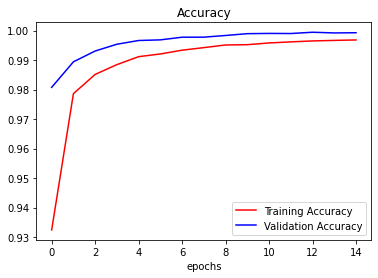

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

def plot_trend_by_epoch(tr_values, val_values, title):
        epoch_number = range(len(tr_values))
        plt.plot(epoch_number, tr_values, 'r')
        plt.plot(epoch_number, val_values, 'b')
        plt.title(title)
        plt.xlabel('epochs')
        plt.legend(['Training '+title, 'Validation '+title])
        plt.figure()
hist_dict = history.history
tr_accuracy, val_accuracy = hist_dict['accuracy'], \
                                hist_dict['val_accuracy']
plot_trend_by_epoch(tr_accuracy, val_accuracy, "Accuracy")

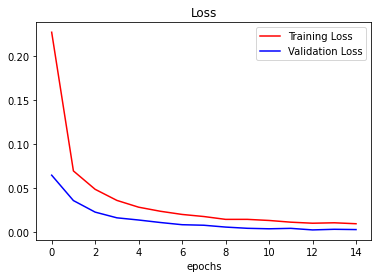

<Figure size 432x288 with 0 Axes>

In [25]:
tr_loss, val_loss = hist_dict['loss'], hist_dict['val_loss']
plot_trend_by_epoch(tr_loss, val_loss, "Loss")